### Classifying and predicting early hospital readmissions:

Classifying with supervised learning whether diabetic patients are readmitted, and if they are, if it's before or after 30 days.

Using the dataset from here: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

In [1]:
import pandas as pd
import patsy as patsy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# SMOTE
from imblearn.over_sampling import SMOTE

# Undersampling
from imblearn.under_sampling import RandomUnderSampler

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import pickle

%pylab inline

%config InlineBackend.figure_format = 'svg'
sns.set_style("white")

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open("x_liv.pkl", 'rb') as picklefile: 
    x_liv = pickle.load(picklefile)

with open("y_liv.pkl", 'rb') as picklefile: 
    y_liv = pickle.load(picklefile)

with open("y_train_liv.pkl", 'rb') as picklefile: 
    y_train_liv = pickle.load(picklefile)

with open("y_test_liv.pkl", 'rb') as picklefile: 
    y_test_liv = pickle.load(picklefile)

with open("x_train_liv.pkl", 'rb') as picklefile: 
    x_train_liv = pickle.load(picklefile)

with open("x_test_liv.pkl", 'rb') as picklefile: 
    x_test_liv = pickle.load(picklefile)

with open("x_train_scaled_liv.pkl", 'rb') as picklefile: 
    x_train_scaled_liv = pickle.load(picklefile)

with open("x_test_scaled_liv.pkl", 'rb') as picklefile: 
    x_test_scaled_liv = pickle.load(picklefile)
    
with open("x_scaled_liv.pkl", 'rb') as picklefile: 
    x_scaled_liv = pickle.load(picklefile)

with open("patientdataICD9_liv.pkl", 'rb') as picklefile: 
    patientdataICD9_liv = pickle.load(picklefile)

In [3]:
x_train = x_train_liv
y_train = y_train_liv
x_test = x_test_liv
y_test = y_test_liv
x = x_scaled_liv
y = y_liv

#### Reducing the classes to binary classes ('>30' is now also 'NO'):

In [4]:
y = y.str.replace('>30','NO')
y_test = y_test.str.replace('>30','NO')
y_train = y_train.str.replace('>30','NO')

In [5]:
# pulling these in from pickle now

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [6]:
NBmodel = naive_bayes.GaussianNB()
NBmodel.fit(x_train, y_train)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.165
              precision    recall  f1-score   support

         <30       0.12      0.97      0.21      2839
          NO       0.94      0.06      0.12     22190

   micro avg       0.17      0.17      0.17     25029
   macro avg       0.53      0.52      0.16     25029
weighted avg       0.85      0.17      0.13     25029



In [7]:
def makematrix(y_test, y_pred):
    score = metrics.accuracy_score(y_test, y_pred)

    confm = metrics.confusion_matrix(y_test, y_pred, labels=list(y_test.unique()))
    confm = confm.astype('float') / confm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10,10))
    sns.heatmap(confm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

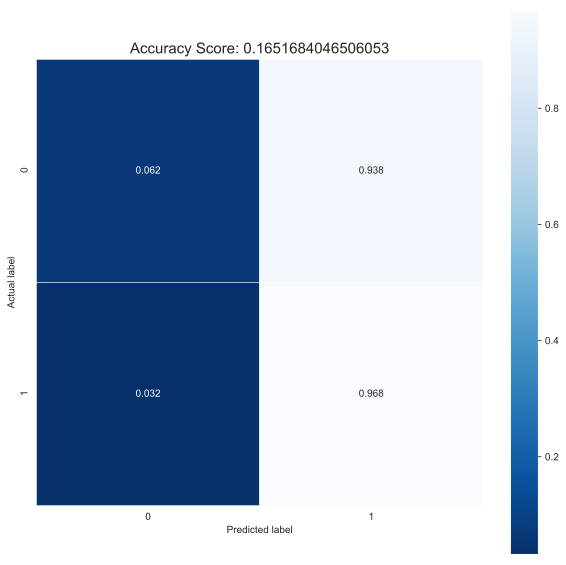

In [8]:
makematrix(y_test, y_pred)

#### Gaussian NB basically just predicted all <30, so recall for that class was great, but everything else was awful

In [9]:
y_test.value_counts()

NO     22190
<30     2839
Name: readmitted, dtype: int64

In [10]:
NBmodel = naive_bayes.BernoulliNB()
NBmodel.fit(x_train, y_train)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.883
              precision    recall  f1-score   support

         <30       0.30      0.02      0.05      2839
          NO       0.89      0.99      0.94     22190

   micro avg       0.88      0.88      0.88     25029
   macro avg       0.60      0.51      0.49     25029
weighted avg       0.82      0.88      0.84     25029



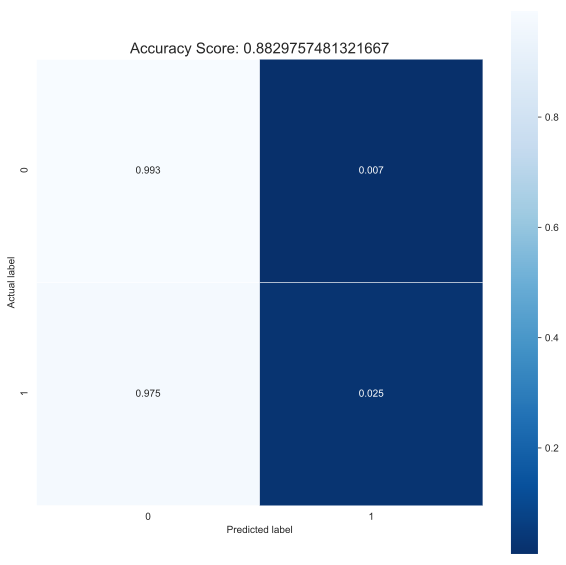

In [11]:
makematrix(y_test, y_pred)

#### I suppose this makes sense, because most of my data is categorical. I was really hoping for better performance from Gaussian, though.

In [12]:
# I can't use Multinomial with my scaled data, since I have negative values in there

NBmodel = naive_bayes.MultinomialNB()
NBmodel.fit(x_train, y_train)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.859
              precision    recall  f1-score   support

         <30       0.27      0.14      0.19      2839
          NO       0.90      0.95      0.92     22190

   micro avg       0.86      0.86      0.86     25029
   macro avg       0.58      0.55      0.55     25029
weighted avg       0.83      0.86      0.84     25029



#### SMOTE:

In [13]:
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train)

In [14]:
NBmodel = naive_bayes.BernoulliNB()
NBmodel.fit(x_train_smote, y_train_smote)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.841
              precision    recall  f1-score   support

         <30       0.20      0.13      0.16      2839
          NO       0.89      0.93      0.91     22190

   micro avg       0.84      0.84      0.84     25029
   macro avg       0.55      0.53      0.53     25029
weighted avg       0.81      0.84      0.83     25029



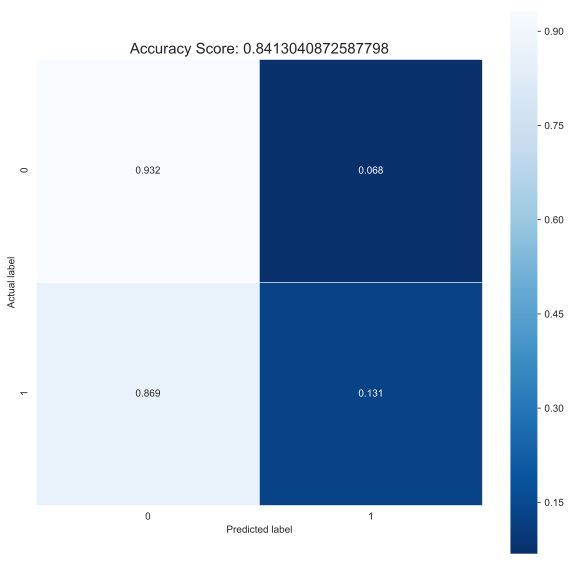

In [15]:
makematrix(y_test, y_pred)

#### SMOTE did worse across the board here. Wow. Ouch.

In [16]:
NBmodel = naive_bayes.GaussianNB()
NBmodel.fit(x_train_smote, y_train_smote)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.191
              precision    recall  f1-score   support

         <30       0.12      0.94      0.21      2839
          NO       0.93      0.10      0.17     22190

   micro avg       0.19      0.19      0.19     25029
   macro avg       0.52      0.52      0.19     25029
weighted avg       0.83      0.19      0.18     25029



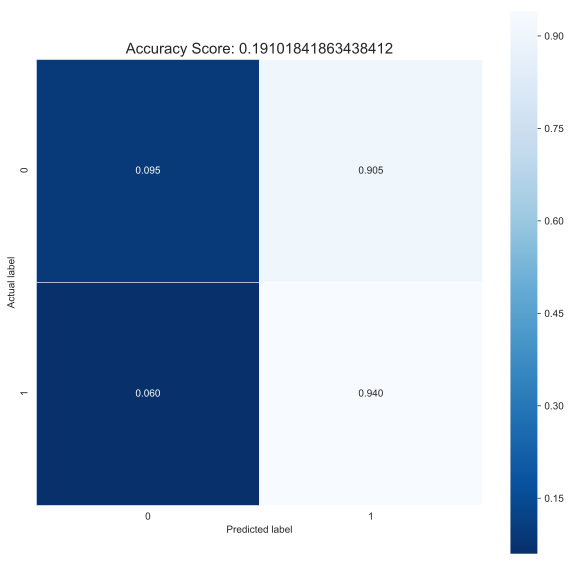

In [17]:
makematrix(y_test, y_pred)

#### Gaussian NB with SMOTE also basically just predicted all <30, so recall for that class was great, but everything else was awful

#### Undersampling:

In [18]:
rus = RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled = rus.fit_sample(x_train, y_train)

In [19]:
# sns.countplot(y_train_undersampled);

In [20]:
NBmodel = naive_bayes.BernoulliNB()
NBmodel.fit(x_train_undersampled, y_train_undersampled)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.611
              precision    recall  f1-score   support

         <30       0.17      0.63      0.27      2839
          NO       0.93      0.61      0.74     22190

   micro avg       0.61      0.61      0.61     25029
   macro avg       0.55      0.62      0.50     25029
weighted avg       0.84      0.61      0.68     25029



In [21]:
NBmodel = naive_bayes.GaussianNB()
NBmodel.fit(x_train_undersampled, y_train_undersampled)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.246
              precision    recall  f1-score   support

         <30       0.12      0.90      0.21      2839
          NO       0.93      0.16      0.28     22190

   micro avg       0.25      0.25      0.25     25029
   macro avg       0.52      0.53      0.24     25029
weighted avg       0.84      0.25      0.27     25029



Text(0.5, 1.0, 'Precision Recall Curve')

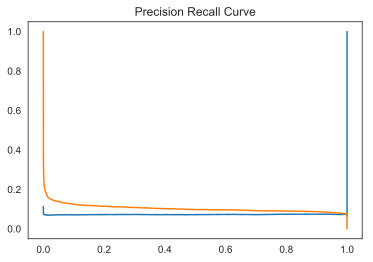

In [22]:
from sklearn.metrics import precision_recall_curve

y_test_num = y_test.copy()
y_test_num = y_test_num.replace('NO', 0)
y_test_num = y_test_num.replace('<30', 1)

model = NBmodel

y_score = model.predict_proba(x_test)[:, 1]
p, r, t = precision_recall_curve(y_test_num, y_score)

# adding last threshold of '1' to threshold list
t = np.vstack([t.reshape([-1, 1]), 1])

plt.plot(t, p)
plt.plot(t, r)
plt.title('Precision Recall Curve')
# yellow = recall
# blue = precision